# Анализ продаж компьютерных игр

**Содержание:**

>[Проект: Сборный проект - 1. Продажи компьютерных игр](#scrollTo=T8PXPQv61YB6)

>>[Описание проекта](#scrollTo=nWr4rpMJ17Hl)

>>[Шаг 1. Общая информация о датасете](#scrollTo=BRgdYWH02KFr)

>>>[Выводы по шагу 1:](#scrollTo=ocmicOMQ3vmV)

>>[Шаг 2. Предобработка данных](#scrollTo=GSb9myAK32Yd)

>>>[Приведение названий столбцов к нижнему регистру](#scrollTo=M8gYVzOkPbfk)

>>>[Обработка дубликатов](#scrollTo=5WMwyQrE35s8)

>>>[Обработка пропусков и преобразование типов данных](#scrollTo=pc7_G1YRO0hH)

>>>[Выводы по шагу 2:](#scrollTo=CQs5FjIPRcgr)

>>[Шаг 3. Исследовательский анализ данных](#scrollTo=glXGpj_x48Sk)

>>>[Количество выпущенных игр в разные годы](#scrollTo=uY9zjsdf5ArM)

>>>[Изменение продаж популярных платформ по годам](#scrollTo=ToSuUgaf5NEZ)

>>>[Диаграмма размаха по глобальным продажам игр в разбивке по платформам](#scrollTo=JuKDbEvb7Bul)

>>>[Влияние отзывов пользователей и критиков на продажи](#scrollTo=oTJ05RkR7M1a)

>>>[Распределение игр по жанрам](#scrollTo=VnJzlri07aH5)

>>>[Выводы по шагу 3:](#scrollTo=2eYYwSWJvWNo)

>>[Шаг 4. Портрет пользователя каждого региона](#scrollTo=NhdDjyZn7tFu)

>>>[Самые популярные платформы по регионам](#scrollTo=vg5A-ijF7vo1)

>>>[Самые популярные жанры по регионам](#scrollTo=m0WQXabm7-mr)

>>>[Влияние возрастного рейтинга на продажи в каждом регионе](#scrollTo=dA7D0ecd9t1u)

>>>[Выводы по шагу 4:](#scrollTo=QfzBOYHW-Tbc)

>>[Шаг 5. Проверка гипотез](#scrollTo=E0GH28jt-WMS)

>>>[Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#scrollTo=458mJ-_u-8dd)

>>>[Средние пользовательские рейтинги жанров Action и Sports разные](#scrollTo=3x4BD32y_Sv7)

>>>[Выводы по шагу 5:](#scrollTo=Cpn8clohL0CM)

>>[Итоговые выводы](#scrollTo=5H85AyMBBIdF)



## Описание проекта

Анализ рынка компьютерных игр для интернет-магазина, который продает по всему миру компьютерные игры. Из открытых источников взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Анализ проводится на данных до 2016 года, чтобы магазин мог составить план на 2017 год.

Проведем исследовтельский анализ данных, составим портреты типичных покупателей и проверим статистические гипотезы о рейтингах платформ. Выявим закономерности, определяющие успешность игры. Это позволит магазину спланировать рекламные кампании.

## Описание данных
Все имеющиеся данные относятся к периоду до 2016 года включительно.

Исходная таблица содержит следующие столбцы:


|<!-- -->|<!-- -->|
|:-------------|:-------------|
|Name|название игры|
|Platform|платформа|
|Year_of_Release|год выпуска|
|Genre|жанр игры|
|NA_sales|продажи в Северной Америке (миллионы проданных копий)|
|EU_sales|продажи в Европе (миллионы проданных копий)|
|JP_sales|продажи в Японии (миллионы проданных копий)|
|Other_sales|продажи в других странах (миллионы проданных копий)|
|Critic_Score|оценка критиков (максимум 100)|
|User_Score|оценка пользователей (максимум 10)|
|Rating|возрастной рейтинг от ESRB (Entertainment Software Rating Board)|

## Шаг 1. Общая информация о датасете

### 1.1. Импорт библиотек

In [ ]:
!pip install missingno

import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy import stats as st


In [ ]:
!pip install beautifulsoup4==4.9.3 matplotlib==3.3.4 nltk==3.6.1 numpy==1.20.1 pandas==1.2.4 plotly==5.4.0 psycopg2-binary==2.9.2 regex==2022.3.15 scikit-learn==0.24.1 scipy==1.8.0 seaborn==0.11.1 sqlalchemy==1.4.15 statsmodels==0.13.2

     |████████████████████████████████| 15.4 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 763 kB 69.8 MB/s eta 0:00:01
     |████████████████████████████████| 42.1 MB 266 kB/s  eta 0:00:01
     |████████████████████████████████| 1.5 MB 1.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
  Attempting uninstall: regex
    Found existing installation: regex 2022.8.17
    Uninstalling regex-2022.8.17:
      Successfully uninstalled regex-2022.8.17
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.20
    Uninstalling SQLAlchemy-1.4.20:
      Successfully uninstalled SQLAlchemy-1.4.20


### 1.2. Загрузка и первичный осмотр данных

In [ ]:
try:
    data = pd.read_csv('/content/drive/MyDrive/datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

Изучим общую информацию о датафрейме и его первые строки.


In [ ]:
print(data.info())
display(data.head())
for col in data.columns.tolist():
  print(f'Пропуски в {col}:', data[col].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пропуски в Name: 2
Пропуски в Platform: 0
Пропуски в Year_of_Release: 269
Пропуски в Genre: 2
Пропуски в NA_sales: 0
Пропуски в EU_sales: 0
Пропуски в JP_sales: 0
Пропуски в Other_sales: 0
Пропуски в Critic_Score: 8578
Пропуски в User_Score: 6701
Пропуски в Rating: 6766


### **Выводы по шагу 1:**

* данные адекватно отображаются;
* названия столбцов лучше привести к нижнему регистру;
* все типы данных соответствуют содержанию ячеек, кроме столбцов:
  - `Year_of_Release` (должен быть `integer` вместо `float`);
  - `User_Score` (должен быть `float` вместо `object`);
* имеются пропуски в нескольких столбцах с важными для анализа данными.

## Шаг 2. Предобработка данных

### 2.1. Приведение названий столбцов к нижнему регистру

In [ ]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2. Обработка дубликатов

In [ ]:
print('Количество явных полных дубликатов:', data.duplicated().sum())
print('Количество дубликатов названий игр:',
      data['name'].duplicated().sum())

Количество явных полных дубликатов: 0
Количество дубликатов названий игр: 5155


Рассмотрим игры с повторяющимися названиями, чтобы разобраться, почему их так много.

In [ ]:
data.loc[data['name']=='Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
1730,Grand Theft Auto V,PC,2015.0,Action,0.39,0.69,0.00,0.09,96.0,7.9,M


Похоже, это кроссплатформенные игры. Каждый релиз на новой платформе учитывается в датасете как самостоятельная игра.

Проверим, есть ли строки, в которых совпадают одновременно название, платформа и год выхода.

In [ ]:
data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Дублируется информация об игре `Madden NFL 13` 2012 года на `PS3`: совпадают также жанр, оценки и возрастной рейтинг, но отличаются продажи.

Второе вхождение этой игры в таблицу наименее информативно, поэтому удалим его.

Дубликат с пропущенным названием обработаем позже при проверке пропусков.


In [ ]:
data = data.drop(index=16230)


In [ ]:
display(data[data[['name', 'platform', 'year_of_release']].duplicated(keep=False)])
print(data.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Удаление строки прошло корректно.

### 2.3. Обработка пропусков и преобразование типов данных

Визуализируем пропуски при помощи библиотеки `missingno`. Это поможет легко заметить взаимосвязи в пропусках, а так же их долю в значениях каждого столбца.

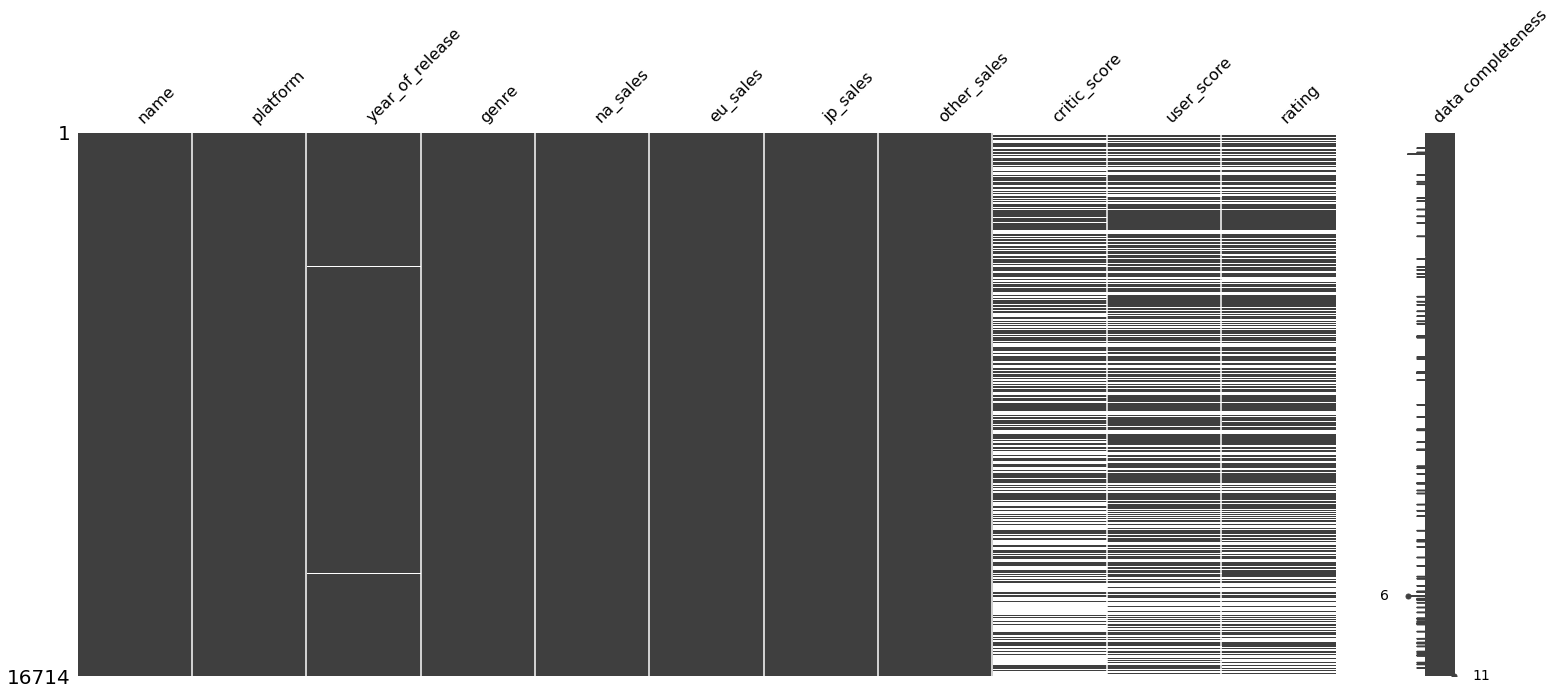

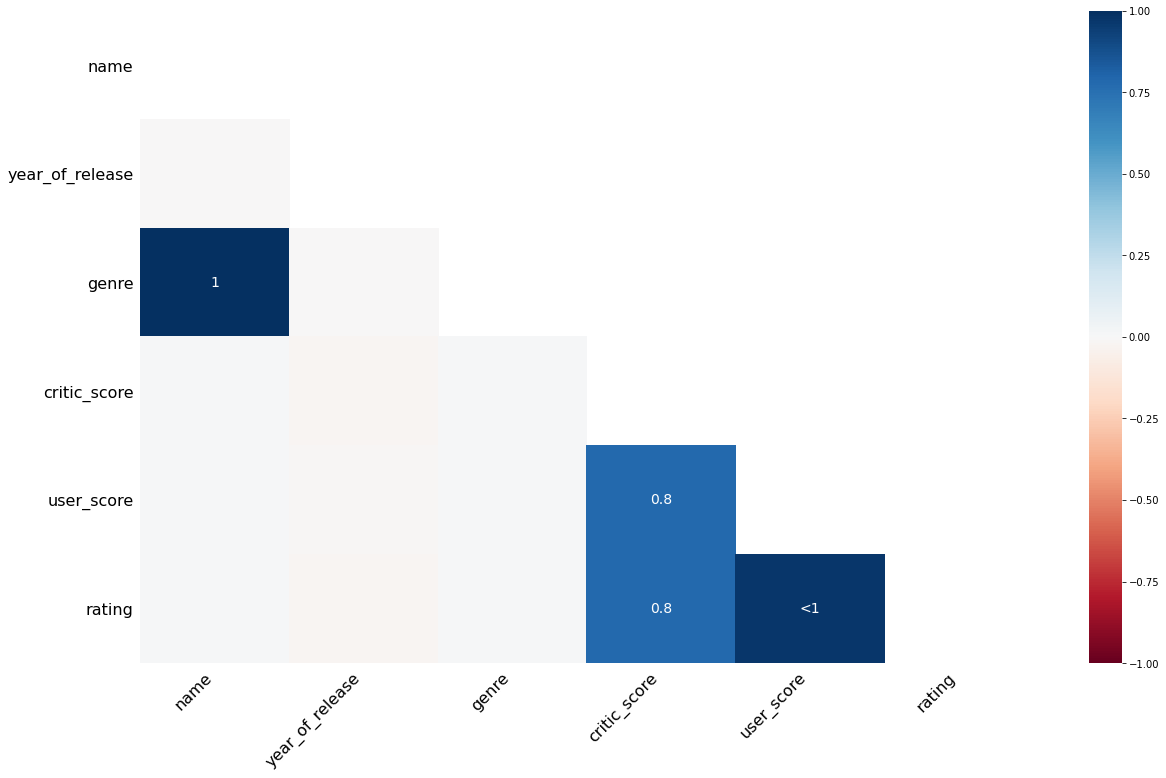

In [ ]:
msno.matrix(data, labels=True)
plt.show()

msno.heatmap(data)
plt.show()

На графиках видно, что все пропуски в `genre` и `name` находятся в одних и тех же строках. И так как этих строк всего 2, можно их удалить.

Кроме того, тесно связаны между собой пропуски в `critic_score`, `user_score`, `rating`. Это означает, что восстановить пропуски в любом из них на основе двух других не получится, даже если бы между ними была сильная корреляция.

Пропуски в `year_of_release` не связаны с пропусками в других данных. Но все равно не могут быть заполнены на основе имеющихся данных в силу индивидуальности каждой игры.

Остальные данные сохранны.

In [ ]:
data = data.dropna(subset=['name']).reset_index(drop=True)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Удалили 2 строки с пропущенными названиями и жанрами. Все остальное осталось на месте.

Для дальнейшего анализа нужно привести тип данных в столбце `user_score` к `float` (тип выбран потому, что данные в столбце представляют собой вычисленную среднюю оценку игры от пользователей и с трудом могут быть адекватно выражены другим типом).

In [ ]:
print(data['user_score'].describe())

count     10013
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object


Значение `tbd` по смыслу эквивалентно `nan`. Это аббревиатура от `to be determined`: *будет определено*, то есть *пока не известно*.

Отсутствующие значения в `user_score` можно заменить нулями. Такое значение демонстрирует отсутствие оценок от пользователей, поскольку оценка должна находиться в промежутке от 1 до 10.

Достоверно восстановить их на основании других имеющихся данных не представляется возможным. C другой стороны, удалять их нельзя, потому что нужно сохранить как можно больше данных о продажах.

In [ ]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].astype('float')

print(data['user_score'].describe())

count    16712.000000
mean         3.235615
std          3.688874
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64


То же касается пропусков в `critic_score` и `year_of_release`: их можно заменить нулями для демонстрации отсутствия данных.

После замены пропусков преобразуем тип данных в столбце `year_of_release`, так как год не может быть ничем кроме натурального числа.

In [ ]:
data['critic_score'] = data['critic_score'].fillna(0)
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  float64
 9   user_score       16712 non-null  float64
 10  rating           9948 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Внимательнее рассмотрим столбец `rating`.

In [ ]:
print(data['rating'].value_counts())
print(data['rating'].isna().sum())

E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64
6764


`K-A` - устаревшее обозначение для рейтинга `E`. `RP` - ничего не сообщающее о характере игры уведомление о том, что рейтинг будет присвоен, по сути аналогично nan и может быть заменено на такую же "заглушку", какой будут заменены пропуски.

Актуализируем эти данные.

Остальные значения соответствуют действующей системе возрастных рейтингов.

In [ ]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'
data['rating'] = data['rating'].fillna('unknown')
data.loc[data['rating']=='RP', 'rating'] = 'unknown'

print(data['rating'].value_counts())

unknown    6767
E          3992
T          2961
M          1563
E10+       1420
EC            8
AO            1
Name: rating, dtype: int64


### **Выводы по шагу 2:**

1. Обнаружен и удален 1 неявный дубликат.
2. Обработано много пропусков:
* замечено, что пропуски в столбцах `critic_score`, `user_score`, `rating` взаимосвязаны, а в `year_of_release` - не связаны с пропусками в других данных;
* удалены 2 строки с пропущенными названиями и жанрами;
* остальные пропуски заменены на значения-заглушки:
  - для `critic_score`, `user_score` (значение `tbd` при этом  приравнено к `nan`) и `year_of_release` это 0;
  - для `rating` это "неизвестно";
* некоторые возможные причины, которые могли привести к пропускам:
  - таблица составлялась по данным из разных источников, и объединение прошло некорректно либо в каком-то из источников изначально не было таких данных;
  - у каких-то непопулярных игр действительно может не быть оценок;
  - ESRB еще не присвоила рейтинг некоторым играм, а какие-то игры могли и не быть направлены в ESRB.
3. Преобразованы типы данных в столбцах:
* `user_score` к типу `float` (тип выбран потому, что данные в столбце представляют собой вычисленную среднюю оценку игры от пользователей и с трудом могут быть адекватно выражены другим типом);
* `year_of_release` к типу `integer` (тип выбран потому, что год может быть только натуральным числом).
4. Неинформативные и несоответствующие действующей системе возрастных рейтингов значения столбца `rating` заменены.


## Шаг 3. Исследовательский анализ данных

### 3.1. Количество выпущенных игр в разные годы

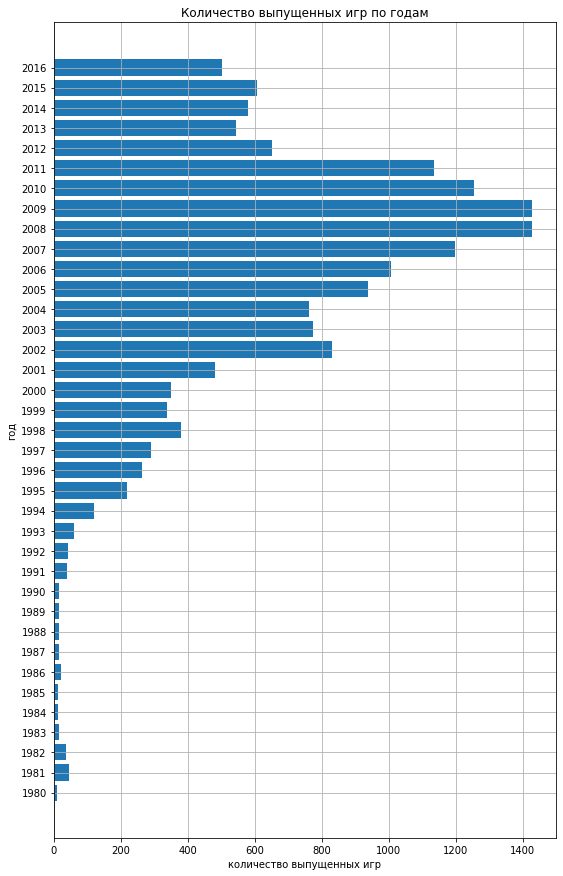

In [ ]:
year_freq = data.loc[data['year_of_release']>0, 'year_of_release'].value_counts().sort_index()

plt.figure(figsize=(9, 15))
plt.barh(year_freq.index, year_freq)
plt.yticks(range(1980, 2017))
plt.grid(True)
plt.ylabel('год')
plt.xlabel('количество выпущенных игр')
plt.title('Количество выпущенных игр по годам')
plt.show()


**Промежуточные выводы:**

1. В 1980-1990-е годы выпускалось сравнительно мало игр.

2. Пик выпуска игр приходится на 2008-2009 годы, после этого количество игр устойчиво снижалось с небольшим подъемом в 2015 году.

3. Имеет смысл в дальнейшем анализе рассматривать данные за 2014-2016 годы.

### 3.2. Изменение продаж популярных платформ по годам

Добавим в таблицу столбец с суммарными продажами `total_sales` и создадим сводную таблицу с суммарными продажами по платформам.

Будем считать платформу популярной в том случае, если она входит в топ-5 по суммарным продажам и в топ-5 по количеству выпускаемых игр.

Ограничим временной промежуток данных для прогноза 2014-2016 годами, так как игровая индустрия очень динамично развивается.

In [ ]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data.head())
print()

platform_pivot = data.loc[data['year_of_release']>2013].pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
).reset_index()


pop_platforms = platform_pivot.sort_values(
    by='total_sales',
    ascending=False).head().merge(
      data.loc[data['year_of_release']>2013, 'platform'].value_counts().reset_index().rename(
          columns={'index':'platform', 'platform':'count'}
      ).head(),
      on='platform',
      how='inner')

print('Платформы с наибольшими продажами и наибольшим количеством игр:')
display(pop_platforms)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,unknown,31.38



Платформы с наибольшими продажами и наибольшим количеством игр:


,platform,total_sales,count
0,PS4,288.15,376
1,XOne,140.36,228
2,3DS,86.68,212
3,PS3,68.18,219


Получили 4 платформы, которые можно считать наиболее популярными.

Посмотрим, как их суммарные продажи распределяются по годам.
Создадим сводную таблицу с соответствующими данными и визуализируем полученные данные.

Сначала построим график для всех платформ за 2000-2016 годы, чтобы определить примерную продолжительность цикла популярности платформы.

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


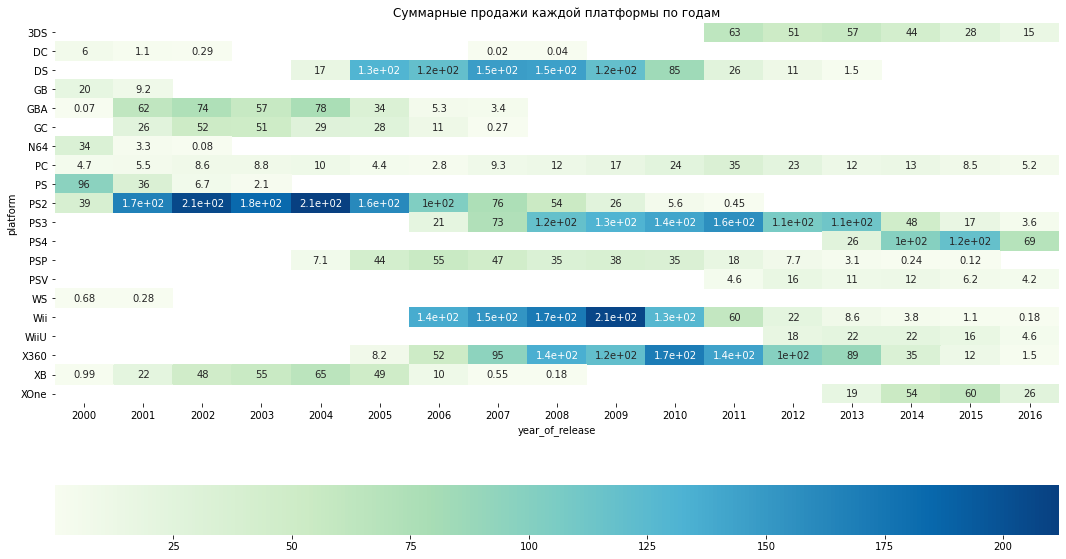

In [ ]:
year_platform_pivot = data.loc[data['year_of_release']>1999].pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum'
)

display(year_platform_pivot)

plt.figure(figsize=(18,10))
sns.heatmap(
    year_platform_pivot,
    annot=True,
    fmt='.2g',
    cmap='GnBu',
    cbar_kws={'orientation': 'horizontal'}
    )
plt.title('Суммарные продажи каждой платформы по годам')
plt.show()

Видно, что приерно за 5-6 лет платформа набирает популярность и теряет ее.

Значит, анализировать для прогноза данные за 3 года - подходящее решение. Тогда будет примерно понятно, на каком этапе своего цикла находится платформа.

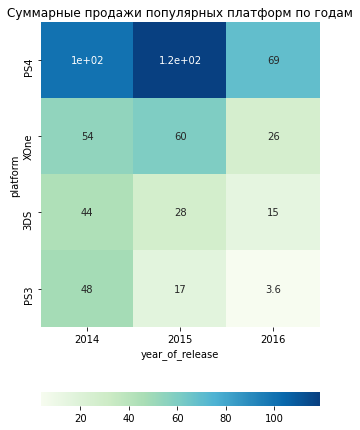

In [ ]:
plt.figure(figsize=(5,8))
sns.heatmap(
    year_platform_pivot.loc[pop_platforms['platform'].to_list(), [2014, 2015, 2016]],
    annot=True,
    fmt='.2g',
    cmap='GnBu',
    cbar_kws={'orientation': 'horizontal'}
    )
plt.title('Суммарные продажи популярных платформ по годам')
plt.show()

**Промежуточные выводы:**

1. На графиках хорошо видно, что примерный цикл популярности платформы длится 5-6 лет.
2. Выводы о платформах:
* лидируют по продажам:
  - `PS4`;
  - `XOne`;  
  - `3DS`;
  - `PS3`;
* ни одна не выглядит растущей;  
* продажи падают:
  - `PS4`;
  - `XOne`;
  - `3DS`;
  - `Wii`;
  - `WiiU`;
  - `PC`;
  - `PSV`;
  - `X360`;
  
* потенциально прибыльные:
  - `PS4` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `XOne` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `3DS` (пик пройден в 2011, но продажи убывают медленнее, чем у других платформ);
  - `PC` (наиболее стабильная платформа, продажи убывают очень медленно и еще могут вырасти).

### 3.3. Диаграмма размаха глобальных продаж игр по платформам

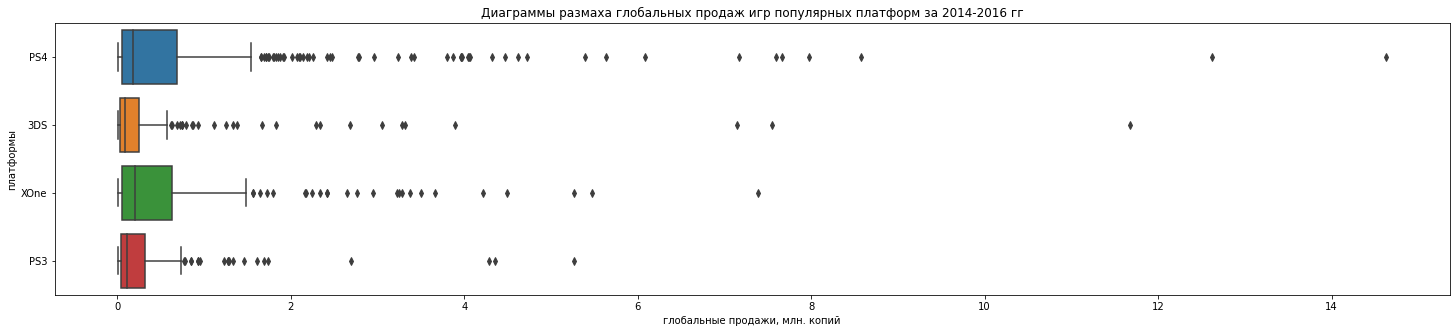

In [ ]:
plt.figure(figsize=(25,5))

sns.boxplot(
    data=data.query(
    'platform in ["PS4", "XOne", "3DS", "PS3"] and year_of_release in [2014, 2015, 2016]'
    ),
    x='total_sales',
    y='platform',
    orient='h'
)
plt.xlabel('глобальные продажи, млн. копий')
plt.ylabel('платформы')
plt.title('Диаграммы размаха глобальных продаж игр популярных платформ за 2014-2016 гг')
plt.show()

**Промежуточные выводы по графику:**

* медианное значение глобальных продаж среди всех платформ гораздо ближе к 0, чем к наибольшим значениям, это говорит о большом количестве плохо продающихся игр и копенсации этого за счет меньшего количества очень успешных игр;
* это подтверждается наличием у каждой из платформ значительного числа выбивающихся значений справа, а также длинными "усами" справа;
* самыми протяженными в сторону увеличения являются значения продаж платформ:
  - `PS4`;
  - `XOne`;
* наименее растянут (и наиболее близок к 0) "ящик" продаж платформы `PSV`.



### 3.4. Влияние отзывов пользователей и критиков на продажи   

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы `PS3`.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
54,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84.0,7.5,E,10.70


Корреляция между critic_score и total_sales: 0.36
Корреляция между user_score и total_sales: 0.27


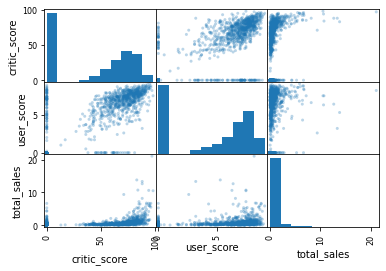

In [ ]:
data_ps3 = data.loc[data['platform']=='PS3']
display(data_ps3.head())


pd.plotting.scatter_matrix(
    data_ps3[['critic_score', 'user_score', 'total_sales']],
    alpha=0.3)

print(
    'Корреляция между critic_score и total_sales:',
    round(data_ps3['critic_score'].corr(data_ps3['total_sales']), 2)
    )

print(
    'Корреляция между user_score и total_sales:',
    round(data_ps3['user_score'].corr(data_ps3['total_sales']), 2)
    )

In [ ]:
platforms = []
corr_user_sales = []
corr_critic_sales = []

for platform in platform_pivot['platform']:

  platforms.append(platform)

  corr_user_sales.append(round(
          data.loc[data['platform']==platform, 'critic_score'].corr(data.loc[data['platform']==platform, 'total_sales']),
          2
          )
  )

  corr_critic_sales.append(round(
      data.loc[data['platform']==platform, 'critic_score'].corr(data.loc[data['platform']==platform, 'total_sales']),
      2
      )
  )

platforms_corr = pd.DataFrame({
    'Платформа': platforms,
    'Корреляция между оценкой пользователей и глобальными продажами': corr_user_sales,
    'Корреляция между оценкой критиков и глобальными продажами': corr_critic_sales
    })

display(platforms_corr)

,Платформа,Корреляция между оценкой пользователей и глобальными продажами,Корреляция между оценкой критиков и глобальными продажами
0,3DS,0.17,0.17
1,PC,0.08,0.08
2,PS3,0.36,0.36
3,PS4,0.23,0.23
4,PSP,0.34,0.34
5,PSV,0.40,0.40
6,Wii,0.19,0.19
7,WiiU,0.30,0.30
8,X360,0.31,0.31
9,XOne,0.27,0.27


**Промежуточные выводы:**

1. Оценки пользователей и критиков практически не влияют на продажи игр на PS3.

2. С другими платформами все обстоит так же.

<div class="alert-success">
<b>Комментарий ревьюера 👍 Вторая итерация </b>

Хорошие диаграммы рассеивания. Корреляция тоже подсчитана верно

### 3.5. Распределение игр по жанрам

Для определения общей популярности жанров найдем медианное значение глобальных продаж каждого жанра за 2014-2016 годы.

,total_sales
genre,
Adventure,0.030
Puzzle,0.045
Strategy,0.060
Action,0.090
Misc,0.090
Racing,0.090
Simulation,0.100
Role-Playing,0.110
Fighting,0.125


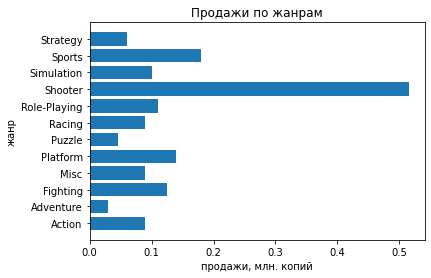

In [ ]:
genre_pivot = data.loc[data['year_of_release']>2013].pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='median'
)

display(genre_pivot.sort_values(by='total_sales'))

plt.barh(
    genre_pivot.index,
    width=genre_pivot['total_sales'])
plt.title('Продажи по жанрам')
plt.xlabel('продажи, млн. копий')
plt.ylabel('жанр')
plt.show()

**Промежуточные выводы:**

* самые популярные жанры:
  - `shooter`;
  - `sports`;
  - `platform`;
  - `fighting`;
* явно выделяется наипопулярнейший жанр - `shooter` (с большим отрывом от всех остальных);
* наименее популярные жанры (с ощутимым отрывом друг от друга и от остальных):
  - `strategy`;
  - `puzzle`;
  - `adventure`.

### **Выводы по шагу 3:**

1. В 1980-1990-е годы выпускалось сравнительно мало игр, пик выпуска игр приходится на 2008-2009 годы, после этого количество игр устойсиво снижалось с небольшим подъемом в 2015 году. В дальнейшем анализе рассматривались данные за 2014-2016 годы.

2. С помощью графика `heatmap` определили:
* примерный цикл популярности платформы длится 5-6 лет
* лидируют по продажам:
  - `PS4`;
  - `XOne`;
  - `3DS`;
  - `PS3`;
* ни одна платформа не выглядит растущей;  
* продажи так или иначе падают у всех платформ, для которых еще продолжают выпускаться игры;
* потенциально прибыльными можно назвать платформы:
  - `PS4` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `XOne` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `3DS` (пик пройден еще в 2011, но продажи убывают медленнее, чем у других платформ);
  - `PC` (наиболее стабильная платформа, продажи убывают очень медленно и еще могут вырасти).

3. С помощью графика `boxplot` обнаружили следующие характеристики глобальных продаж по платформам:
* медианное значение глобальных продаж среди всех платформ гораздо ближе к 0, чем к наибольшим значениям, это говорит о большом количестве плохо продающихся игр и копенсации этого за счет меньшего количества очень успешных игр;
* это подтверждается наличием у каждой из платформ значительного числа выбивающихся значений справа, а также длинными "усами" справа;
* самыми протяженными в сторону увеличения являются значения продаж платформ:
  - `PS4`;
  - `XOne`;
* наименее растянут (и наиболее близок к 0) "ящик" продаж платформы `PSV`.

4. Удостоверились, что оценки критиков и пользователей практически не влияют на глобальные продажи.
5. Рассмотрели, как игры распределены по жанрам, и пришли к заключениям:
* самые популярные жанры:
  - `shooter`;
  - `sports`;
  - `platform`;
  - `fighting`;
* явно выделяется наипопулярнейший жанр - `shooter` (с большим отрывом от всех остальных);
* наименее популярные жанры (с ощутимым отрывом друг от друга и от остальных):
  - `strategy`;
  - `puzzle`;
  - `adventure`.

## Шаг 4. Портрет пользователя каждого региона

### 4.1. Самые популярные платформы по регионам

Создадим датафрейм с суммарными продажами всех платформ в каждом регионе за период 2014-2016 гг.

Добавим столбцы с рассчитанной долей региональных продаж платформы в глобальных продажах.

И выведем топ-5 платформ для каждого региона:
* Северная Америка;
* Европа;
* Япония.

In [ ]:
regions_pop_platforms = data.loc[data['year_of_release']>2013].groupby('platform')[['eu_sales', 'na_sales', 'jp_sales', 'total_sales']].sum()

regions_pop_platforms['eu_percentage'] = round(
    (regions_pop_platforms['eu_sales'] / regions_pop_platforms['total_sales']) * 100,
    2)
regions_pop_platforms['na_percentage'] = round(
    (regions_pop_platforms['na_sales'] /regions_pop_platforms['total_sales']) * 100,
    2)
regions_pop_platforms['jp_percentage'] = round(
    (regions_pop_platforms['jp_sales'] /regions_pop_platforms['total_sales']) * 100,
    2)

display(regions_pop_platforms)
print()

print('Топ-5 самых популярных платформ в Северной Америке')
display(
    regions_pop_platforms.loc[:, ['na_sales', 'na_percentage']].sort_values(
        by='na_sales',
        ascending=False
        ).head()
    )
print()

print('Топ-5 самых популярных платформ в Европе')
display(
    regions_pop_platforms.loc[:, ['eu_sales', 'eu_percentage']].sort_values(
        by='eu_sales',
        ascending=False
        ).head()
    )
print()

print('Топ-5 самых популярных платформ в Японии')
display(
    regions_pop_platforms.loc[:, ['jp_sales', 'jp_percentage']].sort_values(
        by='jp_sales',
        ascending=False
        ).head()
    )
print()

,eu_sales,na_sales,jp_sales,total_sales,eu_percentage,na_percentage,jp_percentage
platform,,,,,,,
3DS,16.12,22.64,44.24,86.68,18.60,26.12,51.04
PC,17.97,7.23,0.00,27.05,66.43,26.73,0.00
PS3,25.54,22.05,11.22,68.18,37.46,32.34,16.46
PS4,130.04,98.61,15.02,288.15,45.13,34.22,5.21
PSP,0.00,0.00,0.36,0.36,0.00,0.00,100.00
PSV,3.53,2.52,14.54,22.40,15.76,11.25,64.91
Wii,2.59,2.08,0.00,5.07,51.08,41.03,0.00
WiiU,13.15,19.36,7.31,42.98,30.60,45.04,17.01
X360,15.49,28.30,0.08,48.22,32.12,58.69,0.17



Топ-5 самых популярных платформ в Северной Америке


,na_sales,na_percentage
platform,,
PS4,98.61,34.22
XOne,81.27,57.90
X360,28.30,58.69
3DS,22.64,26.12
PS3,22.05,32.34



Топ-5 самых популярных платформ в Европе


,eu_sales,eu_percentage
platform,,
PS4,130.04,45.13
XOne,46.25,32.95
PS3,25.54,37.46
PC,17.97,66.43
3DS,16.12,18.60



Топ-5 самых популярных платформ в Японии


,jp_sales,jp_percentage
platform,,
3DS,44.24,51.04
PS4,15.02,5.21
PSV,14.54,64.91
PS3,11.22,16.46
WiiU,7.31,17.01


**Промежуточные выводы:**

* регион с самыми значительными долями в общих продажах - Северная Америка;
* регион с наименьшими долями в общих продажах - Япония (за исключением платформы `PSV`, которая пользуется популярностью преимущественно в Японии);
* в топы по каждому региону вошли платформы `PS4` и `PS3`, `3DS` (в Японии `3DS` лидирует, а в других регионах располагается ближе к цонцу топа);
* в Северной Америке и Европе популярна также `XOne` (причем наиболее значительный вклад в ее глобальные продажи вносит Северная Америка);
* в Японии `XOne` не пользуется популярностью, зато популярны `PSV` и `WiiU`.

### 4.2. Самые популярные жанры по регионам

Повторим то же самое для жанров.

Создадим датафрейм с суммарными и медианными продажами всех жанров в каждом регионе за период 2014-2016 гг.

Добавим столбцы с рассчитанной долей региональных продаж жанра в глобальных продажах.


И выведем топ-5 жанров для каждого региона (по медиане):
* Северная Америка;
* Европа;
* Япония.

In [ ]:
regions_pop_genres = data.loc[data['year_of_release']>2013].groupby('genre')[
    ['eu_sales', 'na_sales', 'jp_sales', 'total_sales']].sum().merge(
        data.loc[data['year_of_release']>2013].groupby('genre')[
    ['eu_sales', 'na_sales', 'jp_sales']].median(),
        on='genre',
        how='outer',
        suffixes=('_sum', '_median')
    )



regions_pop_genres['eu_percentage'] = round(
    (regions_pop_genres['eu_sales_sum'] / regions_pop_genres['total_sales']) * 100,
    2)
regions_pop_genres['na_percentage'] = round(
    (regions_pop_genres['na_sales_sum'] / regions_pop_genres['total_sales']) * 100,
    2)
regions_pop_genres['jp_percentage'] = round(
    (regions_pop_genres['jp_sales_sum'] / regions_pop_genres['total_sales']) * 100,
    2)

display(regions_pop_genres)
print()

print('Топ-5 самых популярных жанров в Северной Америке')
display(
    regions_pop_genres.loc[:, ['na_sales_median', 'na_percentage']].sort_values(
        by='na_sales_median',
        ascending=False
        ).head()
    )
print()

print('Топ-5 самых популярных жанров в Европе')
display(
    regions_pop_genres.loc[:, ['eu_sales_median', 'eu_percentage']].sort_values(
        by='eu_sales_median',
        ascending=False
        ).head()
    )
print()

print('Топ-5 самых популярных жанров в Японии')
display(
    regions_pop_genres.loc[:, ['jp_sales_median', 'jp_percentage']].sort_values(
        by='jp_sales_median',
        ascending=False
        ).head()
    )
print()

,eu_sales_sum,na_sales_sum,jp_sales_sum,total_sales,eu_sales_median,na_sales_median,jp_sales_median,eu_percentage,na_percentage,jp_percentage
genre,,,,,,,,,,
Action,74.68,72.53,29.58,199.36,0.020,0.010,0.01,37.46,36.38,14.84
Adventure,6.49,5.64,3.60,17.55,0.000,0.000,0.01,36.98,32.14,20.51
Fighting,6.69,12.43,6.37,28.22,0.020,0.040,0.03,23.71,44.05,22.57
Misc,12.86,15.05,5.61,37.55,0.010,0.010,0.01,34.25,40.08,14.94
Platform,6.80,6.79,2.69,18.09,0.055,0.075,0.00,37.59,37.53,14.87
Puzzle,0.52,0.65,0.93,2.21,0.000,0.000,0.03,23.53,29.41,42.08
Racing,14.13,8.74,1.76,27.52,0.050,0.030,0.00,51.34,31.76,6.40
Role-Playing,28.17,33.47,31.16,101.44,0.010,0.020,0.05,27.77,32.99,30.72
Shooter,65.52,79.02,4.87,170.94,0.220,0.220,0.00,38.33,46.23,2.85



Топ-5 самых популярных жанров в Северной Америке


,na_sales_median,na_percentage
genre,,
Shooter,0.220,46.23
Platform,0.075,37.53
Sports,0.070,42.14
Fighting,0.040,44.05
Racing,0.030,31.76



Топ-5 самых популярных жанров в Европе


,eu_sales_median,eu_percentage
genre,,
Shooter,0.220,38.33
Platform,0.055,37.59
Racing,0.050,51.34
Sports,0.050,41.77
Simulation,0.030,55.60



Топ-5 самых популярных жанров в Японии


,jp_sales_median,jp_percentage
genre,,
Role-Playing,0.05,30.72
Fighting,0.03,22.57
Puzzle,0.03,42.08
Action,0.01,14.84
Adventure,0.01,20.51


**Промежуточные выводы:**

* Северная Америка и Европа снова почти совпали (в топах `shooter`, `platform`, `sports`, `racing`), разница между регионами заключается в процентах от общих продаж, а также в том, что в Европе более популярны `racing`, а в Америке - `role_playing` (они же в большей степени повлияли на общий топ жанров, составленный в шаге 3);
* в Европе популярен жанр `simulation` (и именно Европа вносит большую часть вклада в его глобальные продажи);
* в Японии самым популярным жанром стал `role-playing` (в глобальных продажах которого вклад Японии составляет примерно треть), в топ вошли жанры `puzzle`, `action`, `adventure`, не пользующиеся популярностью в Северной Америке и Европе;
* жанров, входящих в топ во всех регионах, нет, и это говорит о серьезном отличии жанровых предпочтений пользователей из Японии от пользователей из Северной Америки и Европы.


### 4.3. Влияние возрастного рейтинга на продажи в каждом регионе

Для оценки взаимосвязи категориальной переменной (возрастной рейтинг) и численной переменной (продажи) используем корреляционное отношение.

Исключим из рассчетов игры, возрастной рейтинг которых неизвестен.

In [ ]:
def calculate_correlation_ratio(num_var, cat_var):

  values = np.array(num_var)
  ss_total = np.sum((values.mean() - values) ** 2)

  cats = np.unique(cat_var, return_inverse = True)[1]

  ss_betweengroups = 0

  for c in np.unique(cats):

    group = values[np.argwhere(cats == c).flatten()]
    ss_betweengroups += len(group) * (group.mean() - values.mean()) ** 2

  return round(np.sqrt(ss_betweengroups/ss_total), 2)

print(
    'Корреляционное отношение возрастного рейтинга и продаж в Северной Америке:',
    calculate_correlation_ratio(
        data.loc[data['rating']!='unknown', 'na_sales'],
        data.loc[data['rating']!='unknown', 'rating']
    )
    )

print(
    'Корреляционное отношение возрастного рейтинга и продаж в Европе:',
    calculate_correlation_ratio(
        data.loc[data['rating']!='unknown', 'eu_sales'],
        data.loc[data['rating']!='unknown', 'rating']
    )
    )

print(
    'Корреляционное отношение возрастного рейтинга и продаж в Японии:',
    calculate_correlation_ratio(
        data.loc[data['rating']!='unknown', 'jp_sales'],
        data.loc[data['rating']!='unknown', 'rating']
    )
    )

Корреляционное отношение возрастного рейтинга и продаж в Северной Америке: 0.09
Корреляционное отношение возрастного рейтинга и продаж в Европе: 0.1
Корреляционное отношение возрастного рейтинга и продаж в Японии: 0.03


**Промежуточные выводы:**

* все корреляционные отношения продаж и возрастного рейтинга очень слабые, значит, он практически не влияет на продажи в регионах.

### **Выводы по шагу 4:**

1. Популярность платформ и жанров в регионах не одинаковая:
* близки друг к другу Северная Америка и Европа, за счет этого они очень сильно воздействуют на общемировой рейтинг;
* Япония выделяется на их фоне, но ее доля рынка гораздо меньше, поэтому ее особенности нужно рассматривать и учитывать отдельно;
* самый значительный вклад в общие продажи вносит Северная Америка;
* регион с наименьшими долями в общих продажах - Япония (за исключением платформы `3DS` и жанра `role-playing`, которые пользуются популярностью преимущественно в Японии);
* платформы, входящие в топ во всех регионах:
  - `PS2`;
  - `PS3`;
  - `DS`;
* самые популярные жанры:
  - `shooter`;
  - `platform`;
  - `sports`;
  - `racing`;
* при этом в Японии самым популярным жанром стал `role-playing` (в глобальных продажах которого вклад Японии составляет примерно треть), в топ вошли жанры `puzzle`, `action`, `adventure`, не пользующиеся популярностью в Северной Америке и Европе;
* жанров, входящих в топ во всех регионах, нет.

2. Возрастной рейтинг практически не влияет на продажи в регионах.

## Шаг 5. Проверка гипотез

### 5.1. Гипотеза: средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые

**Нулевая гипотеза:** средний `user_score` для `XOne` **равен** среднему `user_score` для `PC`.

**Альтернативная гипотеза:** средний `user_score` для `XOne` **не равен** среднему `user_score` для `PC`.

Уровень значимости: 0.05.

Для проверки двусторонней статистической гипотезы о равенстве двух средних генеральных совокупностей по двум выборочным средним используется критерий Стьюдента (метод `scipy.stats.ttest_ind`).

In [ ]:
hip1_platforms_rating = st.ttest_ind(
    data.loc[data['platform']=='XOne', 'user_score'],
    data.loc[data['platform']=='PC', 'user_score'],
    alternative='two-sided')

print('p-value:', hip1_platforms_rating.pvalue)
if hip1_platforms_rating.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.0005833414469972175
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве среднего `user_score` для `XOne` среднему `user_score` для `PC`, отвергнута.

Есть основания полагать, что пользователи рейтинги платформ `Xbox One` и `PC` отличаются.

### 5.2. Гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` разные

**Нулевая гипотеза:** средний `user_score` для `Action` **равен** среднему `user_score` для `Sports`.

**Альтернативная гипотеза:** средний `user_score` для `Action` **не равен** среднему `user_score` для `Sports`.

Уровень значимости: 0.05.

Для проверки двусторонней статистической гипотезы о равенстве двух средних генеральных совокупностей по двум выборочным средним используется критерий Стьюдента (метод `scipy.stats.ttest_ind`).

In [ ]:
hip2_genres_rating = st.ttest_ind(
    data.loc[data['genre']=='Action', 'user_score'],
    data.loc[data['genre']=='Sports', 'user_score'],
    alternative='two-sided')

print('p-value:', hip2_genres_rating.pvalue)
if hip2_genres_rating.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 1.1356758476860616e-08
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве среднего `user_score` для `Action` среднему `user_score` для `Sports` отвергнута.

Есть основания полагать, что средние поользовательские рейтинги жанров `Action` и `Sports` разные.

### **Выводы по шагу 5:**

1. Есть основания полагать, что пользователи рейтинги платформ `Xbox One` и `PC` отличаются.
2. Есть основания полагать, что средние поользовательские рейтинги жанров `Action` и `Sports` разные.

## Итоговые выводы

1. Были рассмотрены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Особое внимание обращено на:
- годы выпуска;
- платформы;
- продажи;
- отзывы критиков и пользователей.
2. В данных не выявлено дубликатов.
3. В данных выявлено много пропусков:
* удалены 2 строки с пропусками в `name` и `genre`;
* пропуски в `year_of_release` `critic_score`, `user_score` и `rating` заменены на значения-заглушки;
* преобразованы типы данных в столбцах `user_score` и `year_of_release`;
* неинформативные и несоответствующие действующей системе возрастных рейтингов значения столбца; `rating` заменены на актуальные.

4. В ходе исследовательского анализа данных о продажах разных платформ обнаружено:
* в 1980-1990-е годы выпускалось сравнительно мало игр, пик выпуска игр приходится на 2008-2009 годы, после этого количество игр устойсиво снижалось с небольшим подъемом в 2015 году. В дальнейшем анализе рассматривались данные за 2014-2016 годы;

* с помощью графика `heatmap` определили:
  - примерный цикл популярности платформы длится 5-6 лет;
  - лидируют по продажам платформы:
    - `PS4`;
    - `XOne`;
    - `3DS`;
    - `PS3`;
* ни одна платформа не выглядит растущей; продажи так или иначе падают у всех платформ, для которых еще продолжают выпускаться игры;
* потенциально прибыльными можно назвать платформы:
  - `PS4` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `XOne` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `3DS` (пик пройден еще в 2011, но продажи убывают медленнее, чем у других платформ);
  - `PC` (наиболее стабильная платформа, продажи убывают очень медленно и еще могут вырасти);
* с помощью графика `boxplot` обнаружили следующие характеристики глобальных продаж по платформам:
  - медианное значение глобальных продаж среди всех платформ гораздо ближе к 0, чем к наибольшим значениям, это говорит о большом количестве плохо продающихся игр и копенсации этого за счет меньшего количества очень успешных игр;
  - это подтверждается наличием у каждой из платформ значительного числа выбивающихся значений справа, а также длинными "усами" справа;
  - самыми протяженными в сторону увеличения являются значения продаж платформ:
    - `PS4`;
    - `XOne`;
  - наименее растянут (и наиболее близок к 0) "ящик" продаж платформы `PSV`.

4. Удостоверились, что оценки критиков и пользователей практически не влияют на глобальные продажи.
5. Рассмотрели, как игры распределены по жанрам, и пришли к заключениям:
* самые популярные жанры:
  - `shooter`;
  - `sports`;
  - `platform`;
  - `fighting`;
* явно выделяется наипопулярнейший жанр - `shooter` (с большим отрывом от всех остальных);
* наименее популярные жанры (с ощутимым отрывом друг от друга и от остальных):
  - `strategy`;
  - `puzzle`;
  - `adventure`.

5. В ходе анализа данных по регионам обнаружено:
* популярность платформ и жанров в регионах не одинаковая:
  - близки друг к другу Северная Америка и Европа: Япония выделяется на их фоне;
  - самый значительный вклад в общие продажи вносит Северная Америка;
  - регион с наименьшими долями в общих продажах - Япония (за исключением платформы `3DS` и жанра `role-playing`, которые пользуются популярностью преимущественно в Японии);
* платформы, входящие в топ во всех регионах:
  - `PS2`;
  - `PS3`;
  - `DS`;
* жанров, входящих в топ во всех регионах, нет;
* самые популярные жанры в Северной Америке и Европе:
  - `shooter`;
  - `platform`;
  - `sports`;
  - `racing`;
* в Японии самым популярным жанром стал `role-playing` (в глобальных продажах которого вклад Японии составляет примерно треть), в топ вошли жанры `puzzle`, `action`, `adventure`, не пользующиеся популярностью в Северной Америке и Европе;
* возрастной рейтинг практически не влияет на продажи в регионах.

6. Проверка гипотез показала, что:
* есть основания полагать, что средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны;
* есть основания полагать, что средние поользовательские рейтинги жанров `Action` и `Sports` разные.
7. Для транснационального магазина компьютерных игр было бы выгоднее сосредоточиться на:
* пользователях из Северной Америки, так как они вносят наибольший вклад в продажи;
* потенциально прибыльных платформах:
  - `PS4` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `XOne` (только в 2015 прошла свой пик продаж, еще может дать хороший результат);
  - `3DS` (пик пройден в 2011, но продажи убывают медленнее, чем у других платформ);
  - `PC` (наиболее стабильная платформа, продажи убывают очень медленно и еще могут вырасти);
* самом популярном жанре:
  - `shooter`.
8. Магазину, работающему во всех трех рассмотренных регионах, необходимо учитывать особенности Японии отдельно и проводить для этой страны отдельную маркетинговую кампанию и ассортиментную политику.